In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.mixture import GaussianMixture
!pip install bioinfokit
!pip install pandas matplotlib scikit-learn statsmodels
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 865.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=4a5d108ae45f3f349b7be7a7b1786852648ae19c84da9dd9c1096fbd5995c286
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [4]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [5]:
donalds = pd.read_csv('mcdonalds.csv')
donalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
donalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
age=donalds['Age']

In [9]:
age

0       61
1       51
2       62
3       69
4       49
        ..
1448    47
1449    36
1450    52
1451    41
1452    30
Name: Age, Length: 1453, dtype: int64

In [10]:
donalds.drop('Age',axis=1,inplace=True)

In [11]:
donalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male


In [11]:
donalds=donalds.apply(le.fit_transform)

In [12]:
donalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male


In [13]:
donalds['Age']=age

In [14]:
donalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,Age
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female,61
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female,51
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female,62
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female,69
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male,49


In [15]:
donalds['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [16]:
donalds.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
donalds=donalds.apply(le.fit_transform)
donalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,Age
0,0,1,0,1,0,1,1,0,1,0,0,6,0,0,43
1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,33
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,44
3,1,1,0,1,1,1,1,1,0,0,1,3,4,0,51
4,0,1,0,1,1,1,1,0,0,1,0,1,3,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,5,1,29
1449,1,1,0,1,0,0,1,1,0,1,0,1,4,0,18
1450,1,1,0,1,0,1,0,1,1,0,0,2,3,0,34
1451,1,1,0,0,0,1,1,1,0,1,0,3,0,1,23


**Principal Component Analysis**

In [24]:
from sklearn.decomposition import PCA

In [25]:
MD_x = donalds.iloc[:, 0:11]


In [26]:
pca = PCA()
PC_don=pca.fit(MD_x)

In [27]:
PC = pca.fit_transform(MD_x)
print(PC)

[[ 0.42536706 -0.21907878  0.6632553  ...  0.18100693  0.51570617
  -0.56707389]
 [-0.21863768  0.38818996 -0.73082668 ...  0.11147641  0.49331285
  -0.50044033]
 [ 0.37541475  0.73043507 -0.12203978 ... -0.32228786  0.06175857
   0.24274108]
 ...
 [-0.18589445  1.06266156  0.22085675 ...  0.03825472  0.05651822
  -0.01279977]
 [-1.18206441 -0.03856977  0.56156066 ...  0.02226748 -0.00257265
  -0.10531631]
 [ 1.55024186  0.27503101 -0.01373727 ... -0.13658866 -0.43279782
  -0.45607556]]


In [29]:
pca = PCA(n_components = 11)
PC = pca.fit_transform(MD_x)

In [30]:
var = pca.explained_variance_ratio_
var

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [31]:
cumulative_variance_ratio = np.cumsum(np.round(var,decimals = 4)*100)
cumulative_variance_ratio

array([29.94, 49.22, 62.52, 70.83, 76.78, 81.81, 86.19, 90.14, 93.82,
       97.06, 99.99])

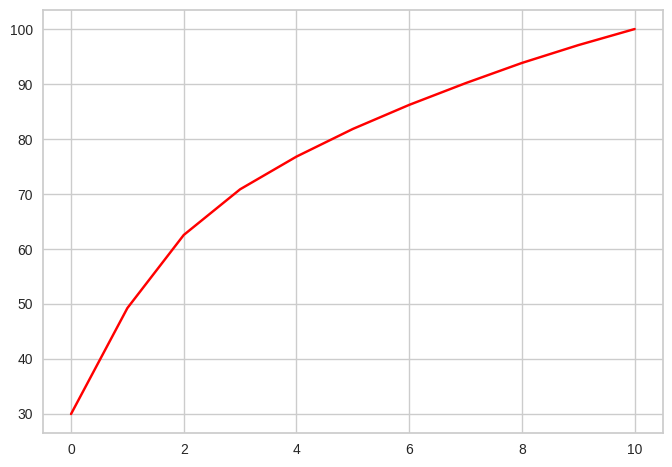

In [32]:
# Variance plot for PCA components obtained
plt.plot(cumulative_variance_ratio,color="red")

In [33]:
print("Standard deviations (eigenvalues of the covariance matrix):")
print(pca.explained_variance_)
print("\nProportion of Variance:")
print(pca.explained_variance_ratio_)
print("\nCumulative Proportion:")
print(cumulative_variance_ratio)

Standard deviations (eigenvalues of the covariance matrix):
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of Variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Proportion:
[29.94 49.22 62.52 70.83 76.78 81.81 86.19 90.14 93.82 97.06 99.99]


<function matplotlib.pyplot.show(close=None, block=None)>

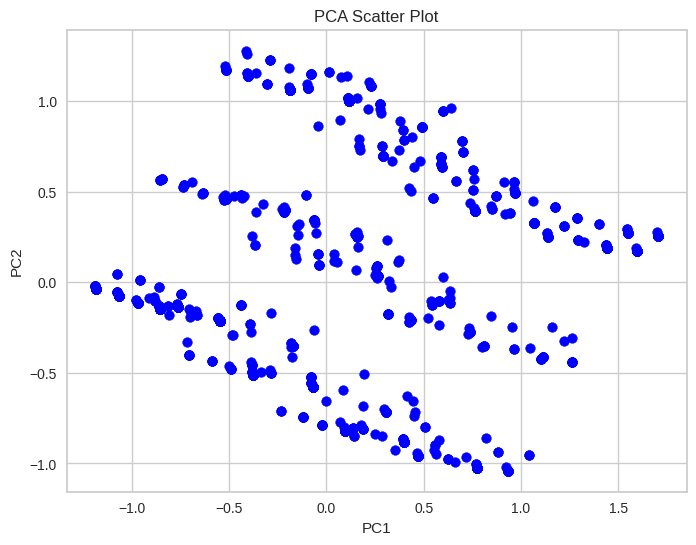

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(PC[:, 0], PC[:, 1], color='Blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show

 #The code snippet you provided is part of a data visualization process typically used in Principal Component Analysis (PCA) to visualize the relationship between original variables and principal components.

Index 11 is out of bounds for pca.components_
Index 12 is out of bounds for pca.components_
Index 13 is out of bounds for pca.components_
Index 14 is out of bounds for pca.components_


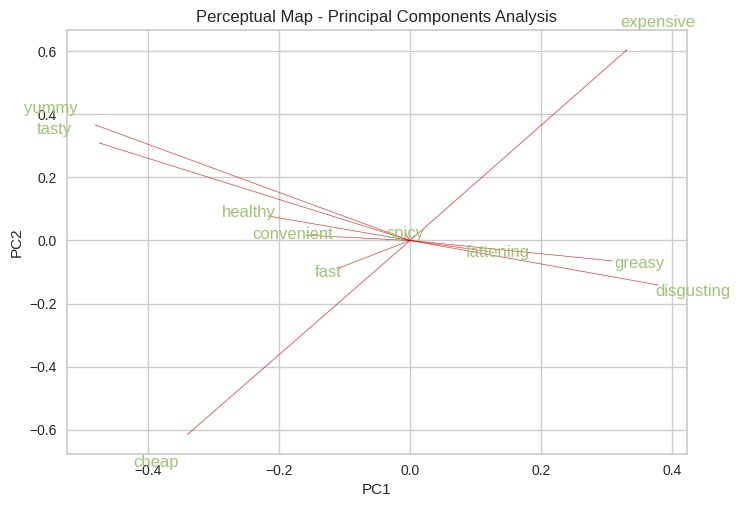

In [35]:
for i, var in enumerate(donalds.columns):
    # Check if i is within the bounds of pca.components_
    if i < pca.components_.shape[1]:
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
        plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, var, color='g', ha='center', va='center')
    else:
        # Handle the case where i is out of bounds (though this case should ideally not happen)
        print(f"Index {i} is out of bounds for pca.components_")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map - Principal Components Analysis')
plt.grid(True)
plt.show()

In [36]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = PC, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [37]:
pf[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']].std()

pc1     0.757050
pc2     0.607456
pc3     0.504619
pc4     0.398799
pc5     0.337405
pc6     0.310275
pc7     0.289697
pc8     0.275122
pc9     0.265251
pc10    0.248842
pc11    0.236903
dtype: float64

In [38]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = MD_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [39]:
pca_scores = PCA().fit_transform(MD_x)

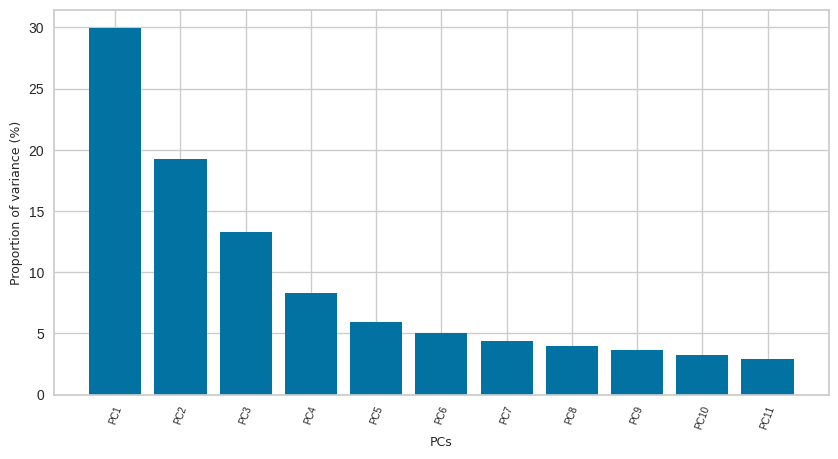

In [40]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [41]:
import numpy as np
np.random.seed(1234)

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Cluster labels for 1 clusters: [0 0 0 ... 0 0 0]
Cluster labels for 2 clusters: [1 0 0 ... 0 0 1]
Cluster labels for 3 clusters: [1 0 0 ... 0 2 1]
Cluster labels for 4 clusters: [1 3 3 ... 3 0 2]
Cluster labels for 5 clusters: [2 3 4 ... 4 0 1]
Cluster labels for 6 clusters: [2 5 0 ... 0 1 4]
Cluster labels for 7 clusters: [3 5 1 ... 1 6 4]
Cluster labels for 8 clusters: [4 2 5 ... 5 3 0]
Cluster labels for 9 clusters: [6 5 5 ... 4 8 0]
Cluster labels for 10 clusters: [6 3 3 ... 4 5 0]


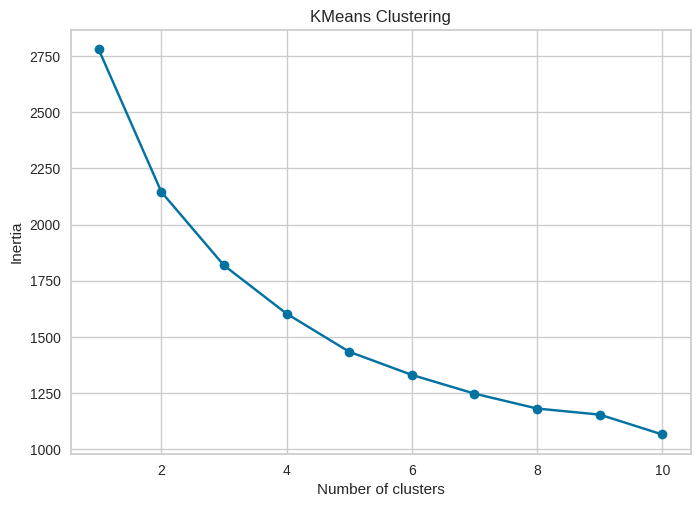

In [54]:
k_values = range(1, 11)
clusterings = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(MD_x)
    print(f"Cluster labels for {k} clusters: {kmeans.labels_}")
    clusterings.append(kmeans)

inertias = [kmeans.inertia_ for kmeans in clusterings]
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('KMeans Clustering')
plt.show()


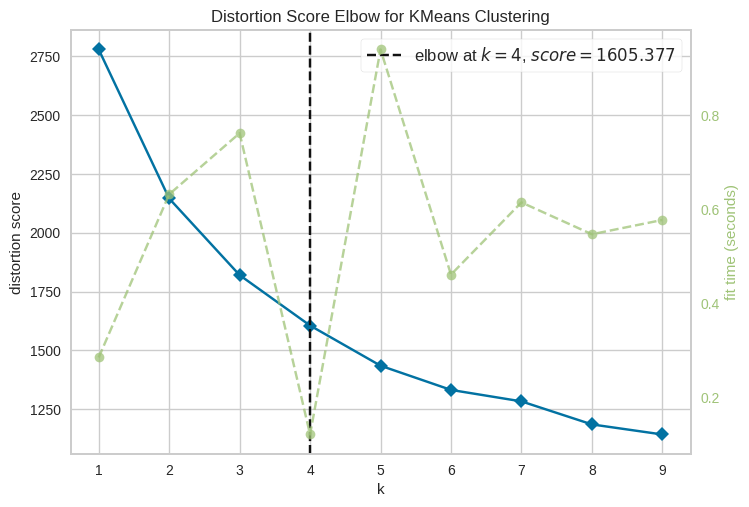

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(MD_x)
visualizer.show()

In [44]:
k_means_model = KMeans(4)
k_means_model.fit_predict(MD_x)
pf_kmeans= pd.concat([pf,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

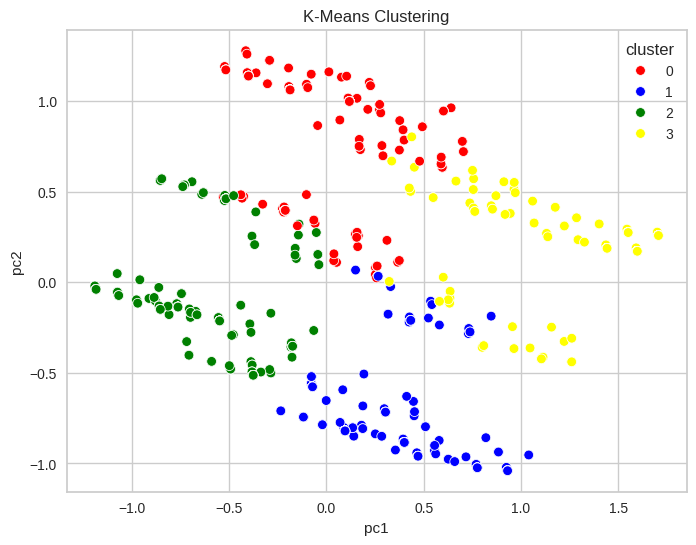

In [45]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x="pc1",y="pc2",hue="cluster",data=pf_kmeans,palette=['red','blue','green','yellow'])
plt.title('K-Means Clustering')
plt.show()

In [46]:
k_means_model = KMeans(4)
k_means_model.fit_predict(MD_x)
pf_kmeans1= pd.concat([MD_x,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pf_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,3


In [47]:
Clusters = KMeans(4, init='k-means++', random_state=42)
Clusters.fit(MD_x)

KMeans(n_clusters=4, random_state=42)

In [48]:
Clusters.labels_

array([3, 2, 2, ..., 2, 0, 1], dtype=int32)

In [49]:
k_means_model = KMeans(4)
k_means_model.fit_predict(MD_x)
pf_kmeans1= pd.concat([MD_x,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pf_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,3
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0


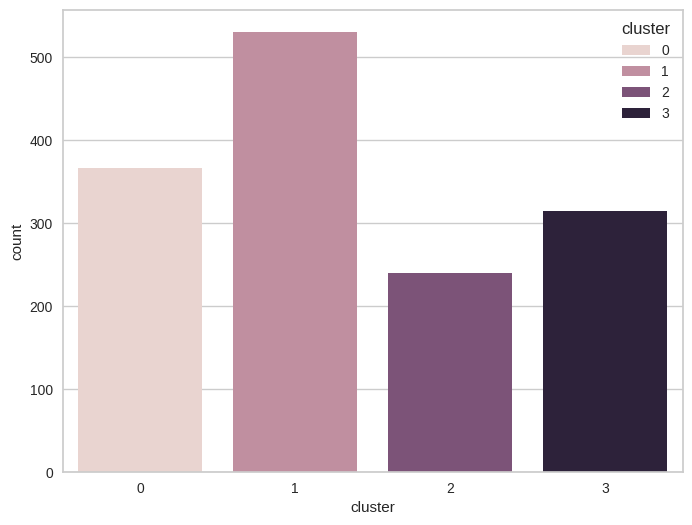

In [50]:

plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=pf_kmeans1, hue='cluster')
plt.show()

In [51]:
donalds['Segment_k']=Clusters.labels_

In [52]:
donalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,Age,Segment_k
0,0,1,0,1,0,1,1,0,1,0,0,6,0,0,43,3
1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,33,2
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,44,2
3,1,1,0,1,1,1,1,1,0,0,1,3,4,0,51,0
4,0,1,0,1,1,1,1,0,0,1,0,1,3,1,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,5,1,29,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,4,0,18,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,3,0,34,2
1451,1,1,0,0,0,1,1,1,0,1,0,3,0,1,23,0


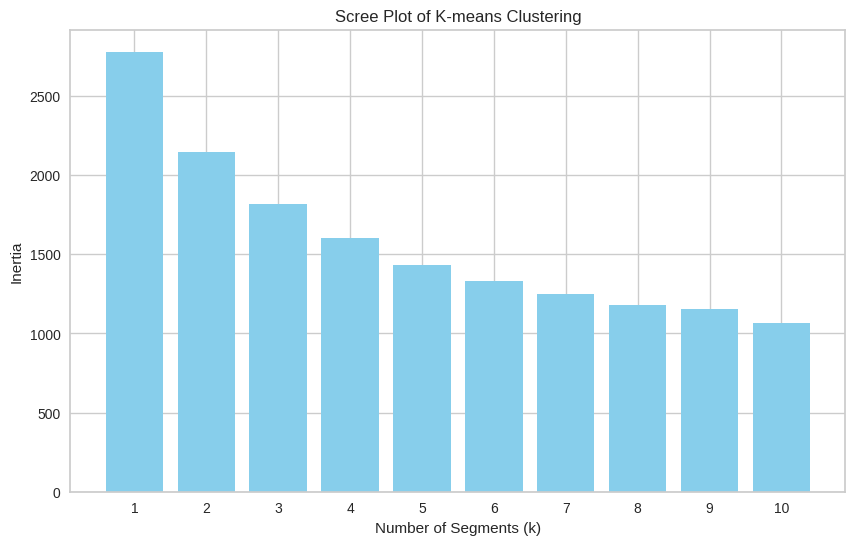

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(k_values, inertias, color='skyblue')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot of K-means Clustering')
plt.xticks(k_values)
plt.show()

In [56]:
y_kmeans = Clusters.fit_predict(MD_x)

In [57]:
donalds.groupby('Segment_k').agg(['mean']).reset_index()


,Segment_k,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,Age
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.887931,0.981034,0.086207,0.794828,0.329310,0.960345,0.922414,0.975862,0.017241,0.320690,0.043103,3.794828,2.584483,0.398276,25.470690
1,1,0.020325,0.682927,0.085366,0.914634,0.695122,0.731707,0.065041,0.089431,0.878049,0.060976,0.715447,6.739837,2.654472,0.569106,30.134146
2,2,0.854489,0.962848,0.133127,0.907121,0.619195,0.860681,0.108359,0.931889,0.897833,0.204334,0.105263,3.798762,2.547988,0.523220,21.811146
3,3,0.023026,0.891447,0.072368,0.924342,0.667763,0.963816,0.934211,0.154605,0.013158,0.072368,0.388158,5.430921,2.822368,0.411184,31.006579


In [59]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from joblib import Parallel, delayed

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform bootstrapping and clustering
def bootstrap_kmeans(data, n_clusters, n_boot):
    clusterings = []
    for i in range(n_boot):
        sample_data = resample(data, random_state=1234 + i)
        kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
        kmeans.fit(sample_data)
        clusterings.append(kmeans.labels_)
    return clusterings

# Wrapper function to perform clustering for multiple values of k
def boot_flexclust(data, k_range, nrep, nboot):
    results = {}
    for k in k_range:
        clusterings = Parallel(n_jobs=-1)(delayed(bootstrap_kmeans)(data, k, nboot) for _ in range(nrep))
        results[k] = clusterings
    return results

# Example usage
nrep = 10
nboot = 100
k_range = range(2, 9)

MD_b28 = boot_flexclust(MD_x, k_range, nrep, nboot)

# MD_b28 now contains the clustering results


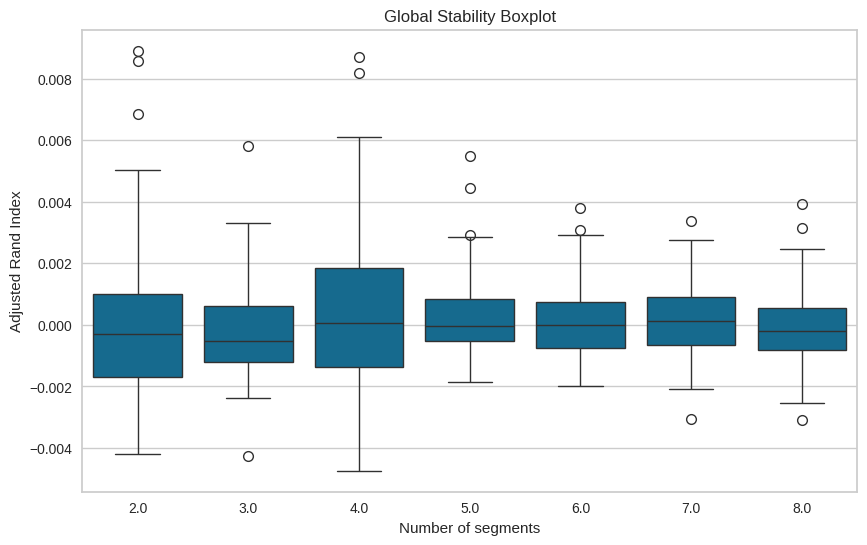

In [60]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seed for reproducibility
np.random.seed(1234)

# Assuming MD_x is your dataset in a numpy array or pandas DataFrame
 # Replace with your dataset

def bootstrap_kmeans(data, n_clusters, n_bootstraps):
    n_samples = MD_x.shape[0]
    ari_scores = []

    # Perform bootstrapping
    for _ in range(n_bootstraps):
        # Resample the dataset with replacement
        boot_data = resample(MD_x, n_samples=n_samples, random_state=None)

        # Fit k-means on the bootstrapped data
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(boot_data)

        # Predict the cluster labels on the original data
        labels = kmeans.predict(MD_x)

        # Store the ARI score
        ari = adjusted_rand_score(labels, kmeans.labels_)
        ari_scores.append(ari)

    return ari_scores

# Parameters
n_clusters_range = range(2, 9)
n_bootstraps = 100

# Compute ARI scores for different number of clusters
ari_results = {n_clusters: bootstrap_kmeans(MD_x, n_clusters, n_bootstraps) for n_clusters in n_clusters_range}

# Prepare data for plotting
plot_data = []
for n_clusters, ari_scores in ari_results.items():
    for score in ari_scores:
        plot_data.append((n_clusters, score))

plot_data = np.array(plot_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x=plot_data[:, 0], y=plot_data[:, 1])
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()


In [67]:
import numpy as np
from sklearn.mixture import GaussianMixture
import pandas as pd



# Fit Gaussian Mixture Model (GMM) treating binary as continuous with Bernoulli distribution
results = []
for k in range(1, 9):
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(MD_x)

    # Calculate log-likelihood, AIC, BIC
    logLik = gmm.score(MD_x)
    AIC = gmm.aic(MD_x)
    BIC = gmm.bic(MD_x)

    results.append({
        'k': k,
        'logLik': logLik,
        'AIC': AIC,
        'BIC': BIC
    })

# Print results similar to R output
print("k k0 converged k k0 logLik AIC BIC")
for result in results:
    print(f" {result['k']}, {result['k']},TRUE, {result['logLik']:.3f} ,{result['AIC']:.2f}, {result['BIC']:.2f}")


k k0 converged k k0 logLik AIC BIC
 1, 1,TRUE, -4.280 ,12592.07, 12998.74
 2, 2,TRUE, 3.402 ,-9577.23, -8758.62
 3, 3,TRUE, 6.919 ,-19640.21, -18409.65
 4, 4,TRUE, 5.836 ,-16336.12, -14693.61
 5, 5,TRUE, 13.616 ,-38791.03, -36736.57
 6, 6,TRUE, 18.173 ,-51876.71, -49410.31
 7, 7,TRUE, 15.469 ,-43863.68, -40985.32
 8, 8,TRUE, 15.172 ,-42843.25, -39552.94


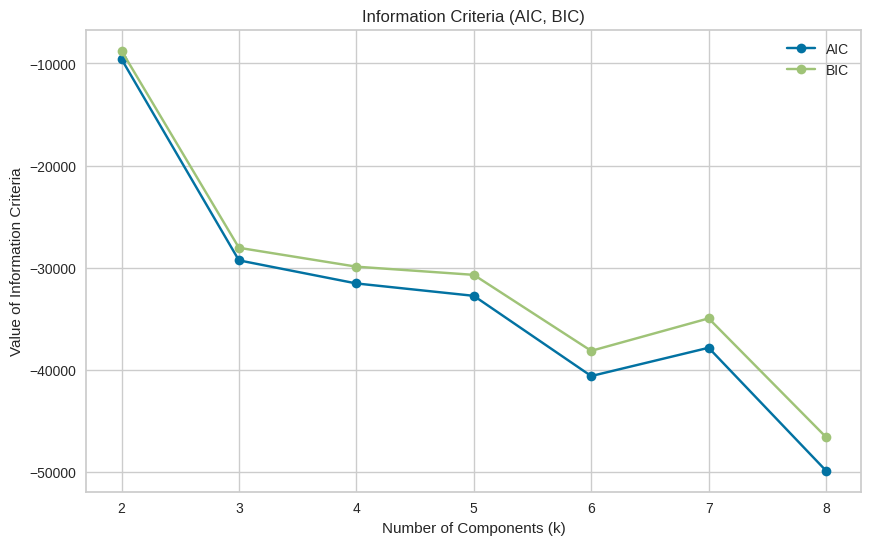

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd


# Fit Gaussian Mixture Models (GMMs) for different numbers of components (k)
k_values = range(2, 9)
AIC_values = []
BIC_values = []
ICL_values = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(MD_x)

    AIC_values.append(gmm.aic(MD_x))
    BIC_values.append(gmm.bic(MD_x))
    # ICL (Integrated Completed Likelihood) is not directly available in sklearn,
    # so it needs to be computed manually if required.

# Plotting AIC, BIC, and potentially ICL
plt.figure(figsize=(10, 6))
plt.plot(k_values, AIC_values, marker='o', label='AIC')
plt.plot(k_values, BIC_values, marker='o', label='BIC')
# If ICL is available, you can plot it as well
# plt.plot(k_values, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [69]:
from collections import Counter

# Convert numpy arrays to lists for easier comparison
#clusters_kmeans = clusters_kmeans.tolist()
#clusters_gmm = clusters_gmm.tolist()


clusters_kmeans = kmeans.fit_predict(MD_x)
clusters_gmm = gmm.predict(MD_x)


# Create a dictionary to count occurrences of (kmeans, gmm) pairs
cluster_pairs = list(zip(clusters_kmeans, clusters_gmm))
cluster_count = Counter(cluster_pairs)

# Display the table
print("Comparison of K-means and GMM clusters:")
print("{:<10} {:<10} {:<10}".format("K-means", "GMM", "Count"))
for (kmeans_cluster, gmm_cluster), count in cluster_count.items():
    print("{:<10} {:<10} {:<10}".format(kmeans_cluster, gmm_cluster, count))


Comparison of K-means and GMM clusters:
K-means    GMM        Count     
6          5          17        
3          2          145       
1          1          176       
2          0          137       
8          1          138       
4          7          84        
9          3          53        
6          0          72        
4          5          44        
1          6          4         
8          7          30        
5          1          57        
7          2          3         
6          4          24        
5          6          99        
0          3          96        
1          2          32        
0          5          10        
7          1          87        
9          5          11        
4          4          9         
3          3          14        
2          3          10        
4          6          21        
0          2          8         
7          6          9         
0          4          5         
2          2          2         
8  

In [70]:
import numpy as np
from scipy.stats import chi2

# Log-likelihood values and degrees of freedom from R
logLik_MD_m4a = -7111.152
logLik_MD_m4 = -7111.146
df = 47

# Calculate the likelihood ratio test statistic
LR_statistic = 2 * (logLik_MD_m4a - logLik_MD_m4)

# Calculate p-value using Chi-square distribution
p_value = 1 - chi2.cdf(LR_statistic, df)

print(f"Likelihood ratio test statistic: {LR_statistic}")
print(f"P-value: {p_value}")


Likelihood ratio test statistic: -0.012000000000625732
P-value: 1.0


Mixture of Regression Model

In [82]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [83]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [84]:
mcdonalds['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [85]:
import re
import pandas as pd  # If using pandas for handling tables

def extract_value(text):
    # Regular expression to find an integer optionally prefixed with a sign
    match = re.search(r'[-+]?\d+', text)
    if match:
        return int(match.group())  # Convert the matched string to an integer
    else:
        return None  # Return None if no valid integer found

# Apply the extract_value function to the 'text_column'
mcdonalds['Like'] = mcdonalds['Like'].apply(extract_value)

# Display the result
print(mcdonalds['Like'])



0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int64


In [86]:
# Reverse the frequency table of 'Like'
like_freq_reversed = mcdonalds['Like'].value_counts().sort_index(ascending=False)

# Create 'Like.n' column
mcdonalds['Like_n'] =  pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Frequency table of 'Like.n'
like_n_freq = mcdonalds['Like_n'].value_counts().sort_index()


In [87]:
like_n_freq

Like_n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64

In [88]:
like_freq_reversed

Like
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64

In [89]:
# Assuming you want to create a formula for regression analysis

# Variable names
variable_names = ["yummy", "convenient", "spicy", "fattening", "greasy",
                  "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Create formula string
formula_string = "Like_n ~ " + " + ".join(variable_names)

print(formula_string)
#Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting

import statsmodels.formula.api as smf

# Assuming 'data' is your DataFrame containing the variables 'Like_n', 'yummy', 'convenient', etc.
model = smf.ols(formula=formula_string, data=mcdonalds)
result = model.fit()
print(result.summary())


Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          4.03e-296
Time:                        05:35:54   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------

In [90]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [91]:
# Perform hierarchical clustering
dist_matrix = pdist(MD_x.T)  # Transpose the data and compute distance matrix
linkage_matrix = linkage(dist_matrix, method='ward')  # Perform hierarchical clustering

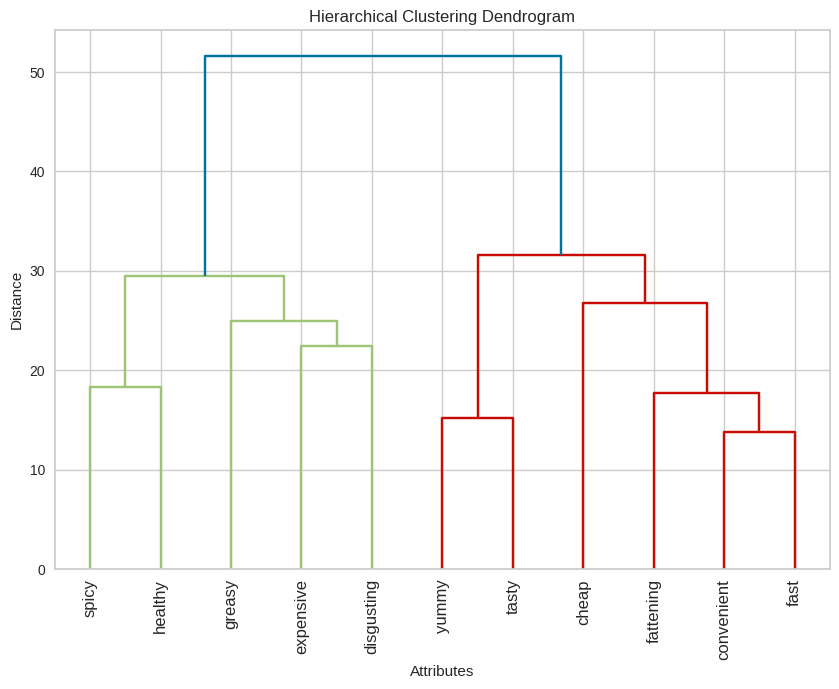

In [92]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=MD_x.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

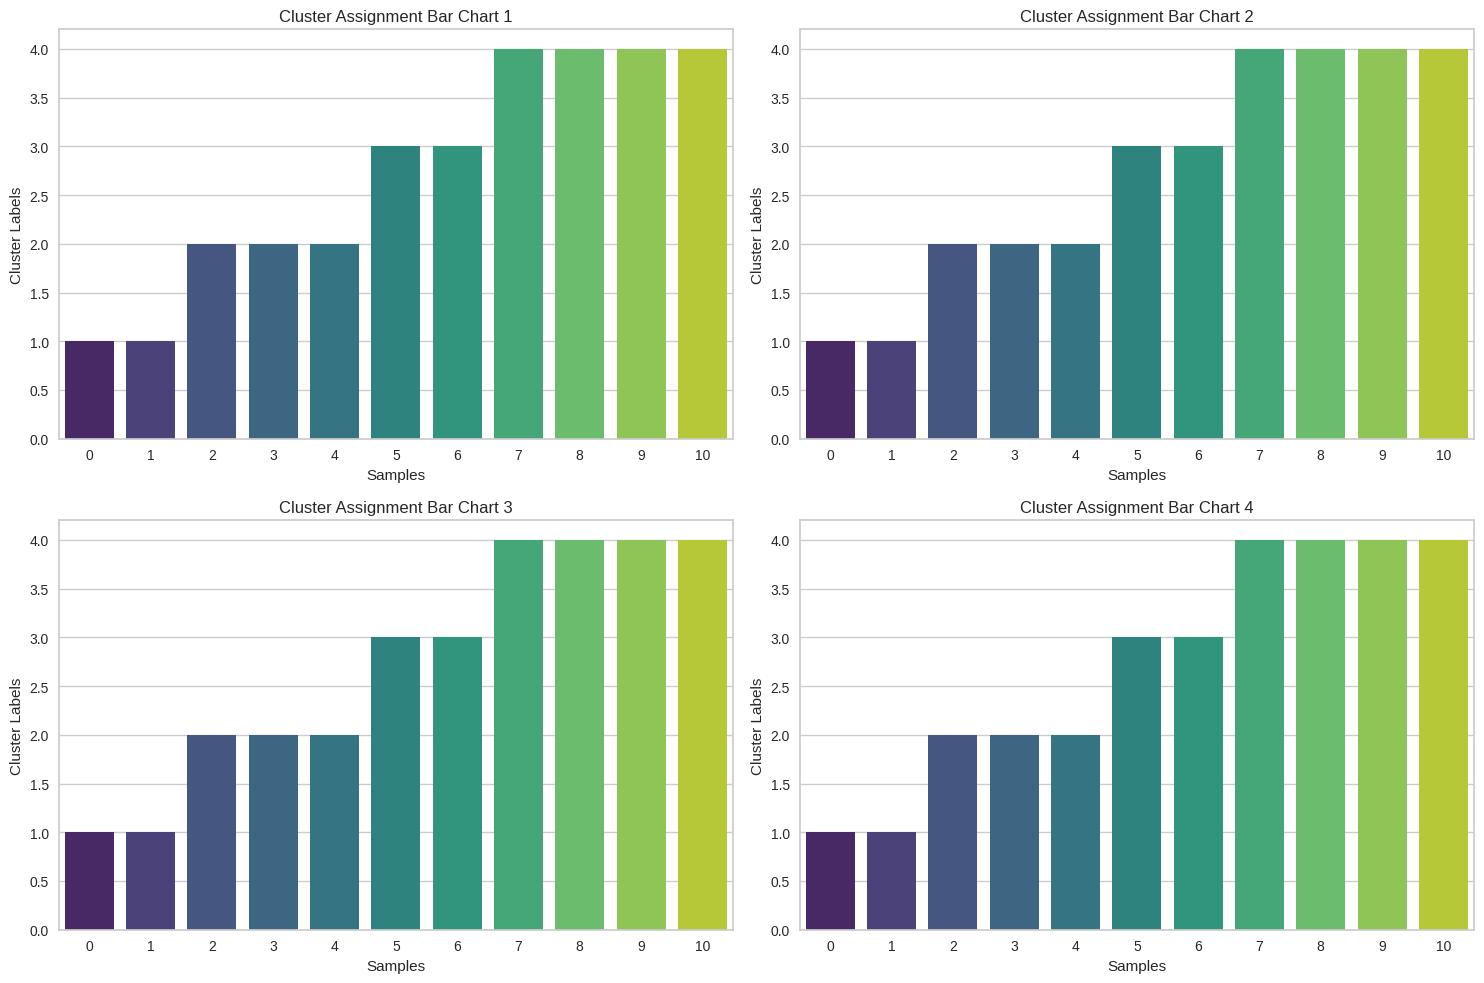

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Transpose the matrix
MD_x_transposed = MD_x.T

# Compute the distance matrix and perform hierarchical clustering
distance_matrix = pdist(MD_x_transposed, metric='euclidean')
Z = linkage(distance_matrix, method='ward')

# Get the order of the clusters
dendro = dendrogram(Z, no_plot=True)
MD_vclust_order = dendro['leaves']

# Get cluster labels (example: assuming 4 clusters)
MD_k4 = fcluster(Z, 4, criterion='maxclust')

MD_k4_ordered = [MD_k4[i] for i in MD_vclust_order]

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot in each subplot
for i, ax in enumerate(axes.flat):
    sns.barplot( y=MD_k4_ordered,x=np.arange(len(MD_k4_ordered)), palette='viridis', ax=ax)
    ax.set_title(f'Cluster Assignment Bar Chart {i+1}')
    ax.set_xlabel('Samples')
    ax.set_ylabel('Cluster Labels')

plt.tight_layout()
plt.show()


Index 11 is out of bounds for pca.components_
Index 12 is out of bounds for pca.components_
Index 13 is out of bounds for pca.components_
Index 14 is out of bounds for pca.components_
Index 15 is out of bounds for pca.components_


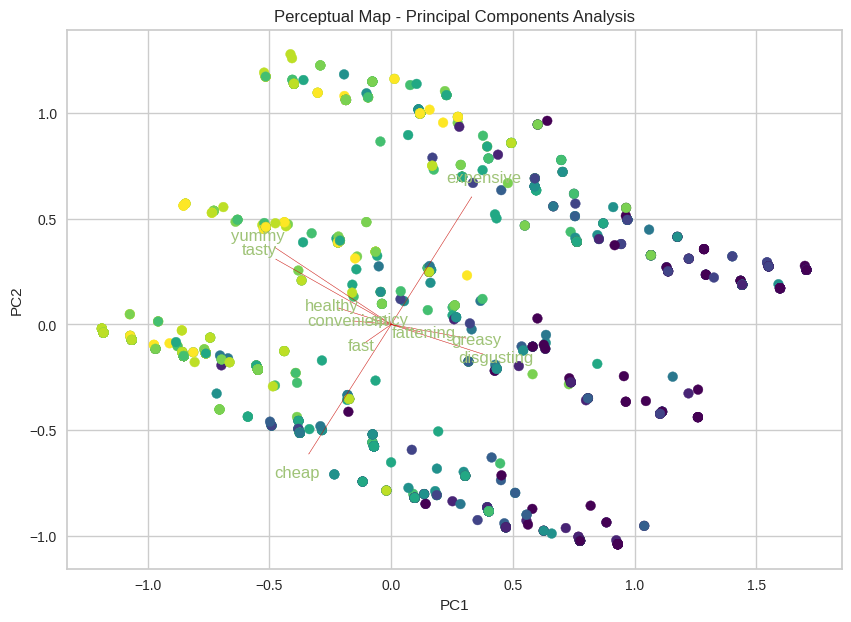

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming MD.k4, MD.pca, and MD.x are defined as follows:
# MD.k4: cluster labels, e.g., obtained from KMeans clustering
# MD.pca: PCA object, e.g., PCA(n_components=2).fit(MD.x)
# MD.x: the dataset on which PCA is applied

# Generate sample data (replace this with your actual data)

MD_k4 = mcdonalds['Like'] # Sample cluster labels

# Perform PCA
MD_pca = PCA(n_components=8)
MD_x_pca = MD_pca.fit_transform(MD_x)

# Plotting
plt.figure(figsize=(10, 7))
scatter = plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], c=MD_k4, cmap='viridis')

# Adding labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset")

# Adding legend for clusters


for i, var in enumerate(donalds.columns):
    # Check if i is within the bounds of pca.components_
    if i < pca.components_.shape[1]:
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
        plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, var, color='g', ha='center', va='center')
    else:
        # Handle the case where i is out of bounds (though this case should ideally not happen)
        print(f"Index {i} is out of bounds for pca.components_")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map - Principal Components Analysis')
plt.grid(True)
plt.show()


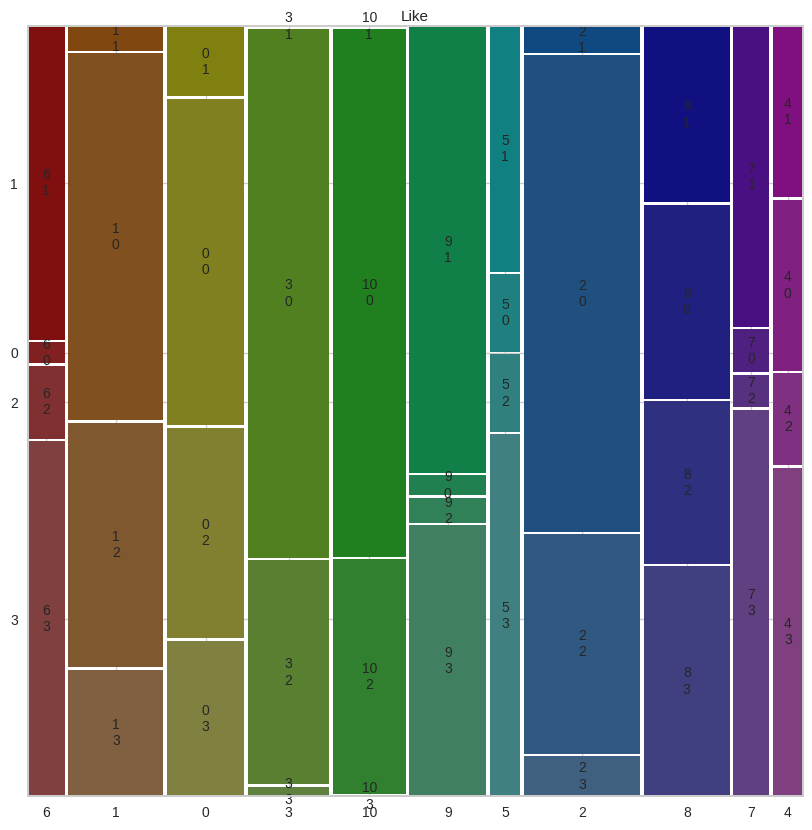

In [96]:
plt.rcParams['figure.figsize']=(10,10)
mosaic(donalds,['Like','Segment_k'])
plt.xlabel('Like')
plt.show()

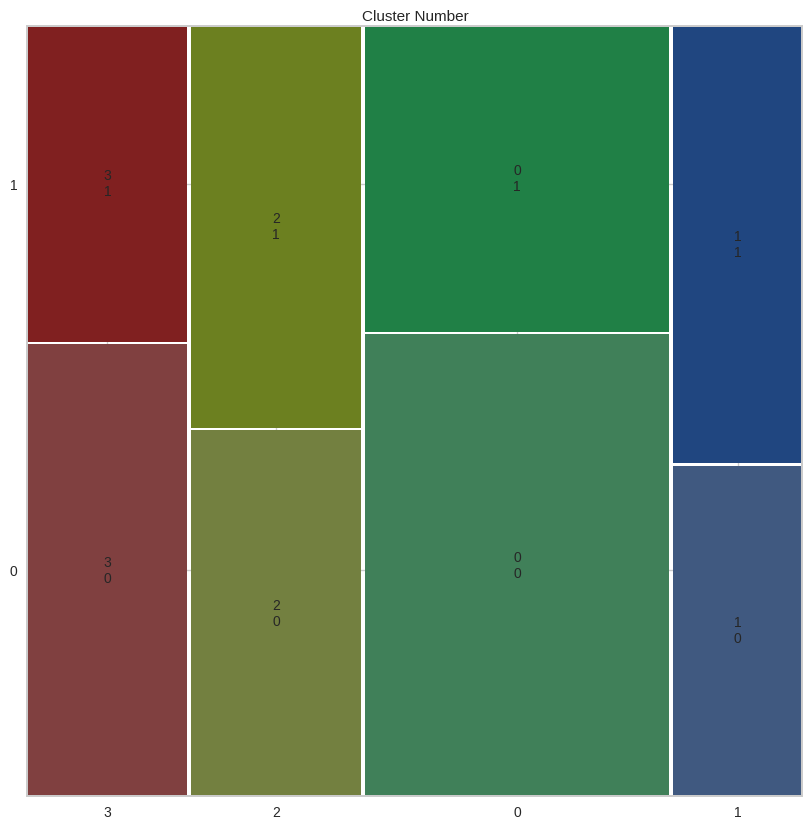

In [97]:
mosaic(donalds,['Segment_k','Gender'])
plt.xlabel('Cluster Number')
plt.show()

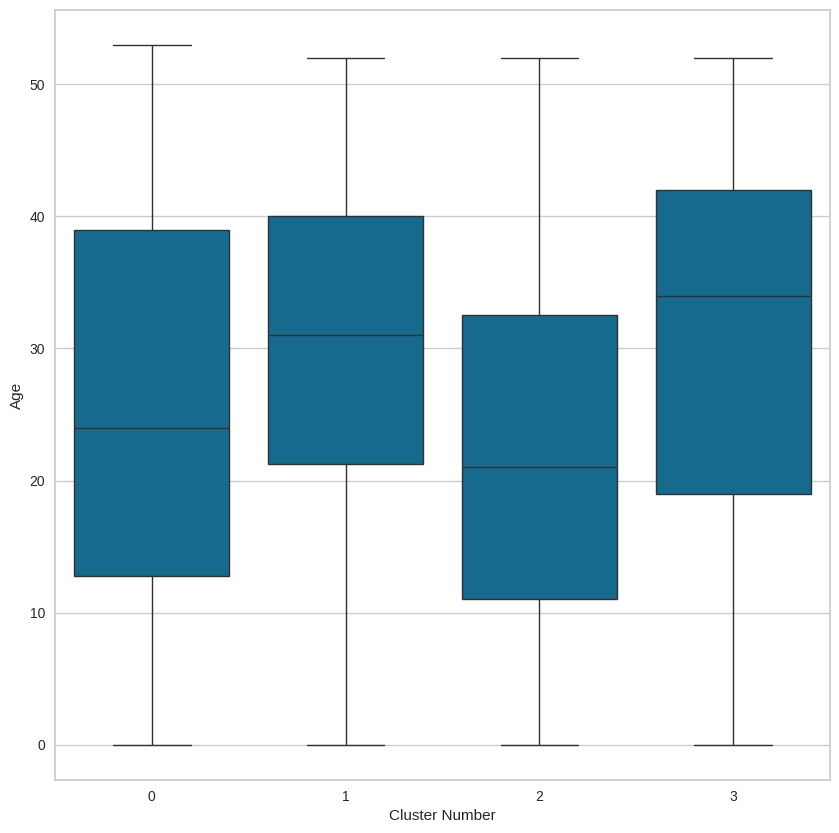

In [98]:
sns.boxplot(x=donalds['Segment_k'], y=donalds['Age'])
plt.xlabel('Cluster Number')
plt.show()

In [99]:
X = donalds.iloc[:,0:15]
Y = donalds.iloc[:,15]

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(1017, 15)
(436, 15)


In [101]:
dc = DecisionTreeClassifier(random_state=1234)
model = dc.fit(X, Y)


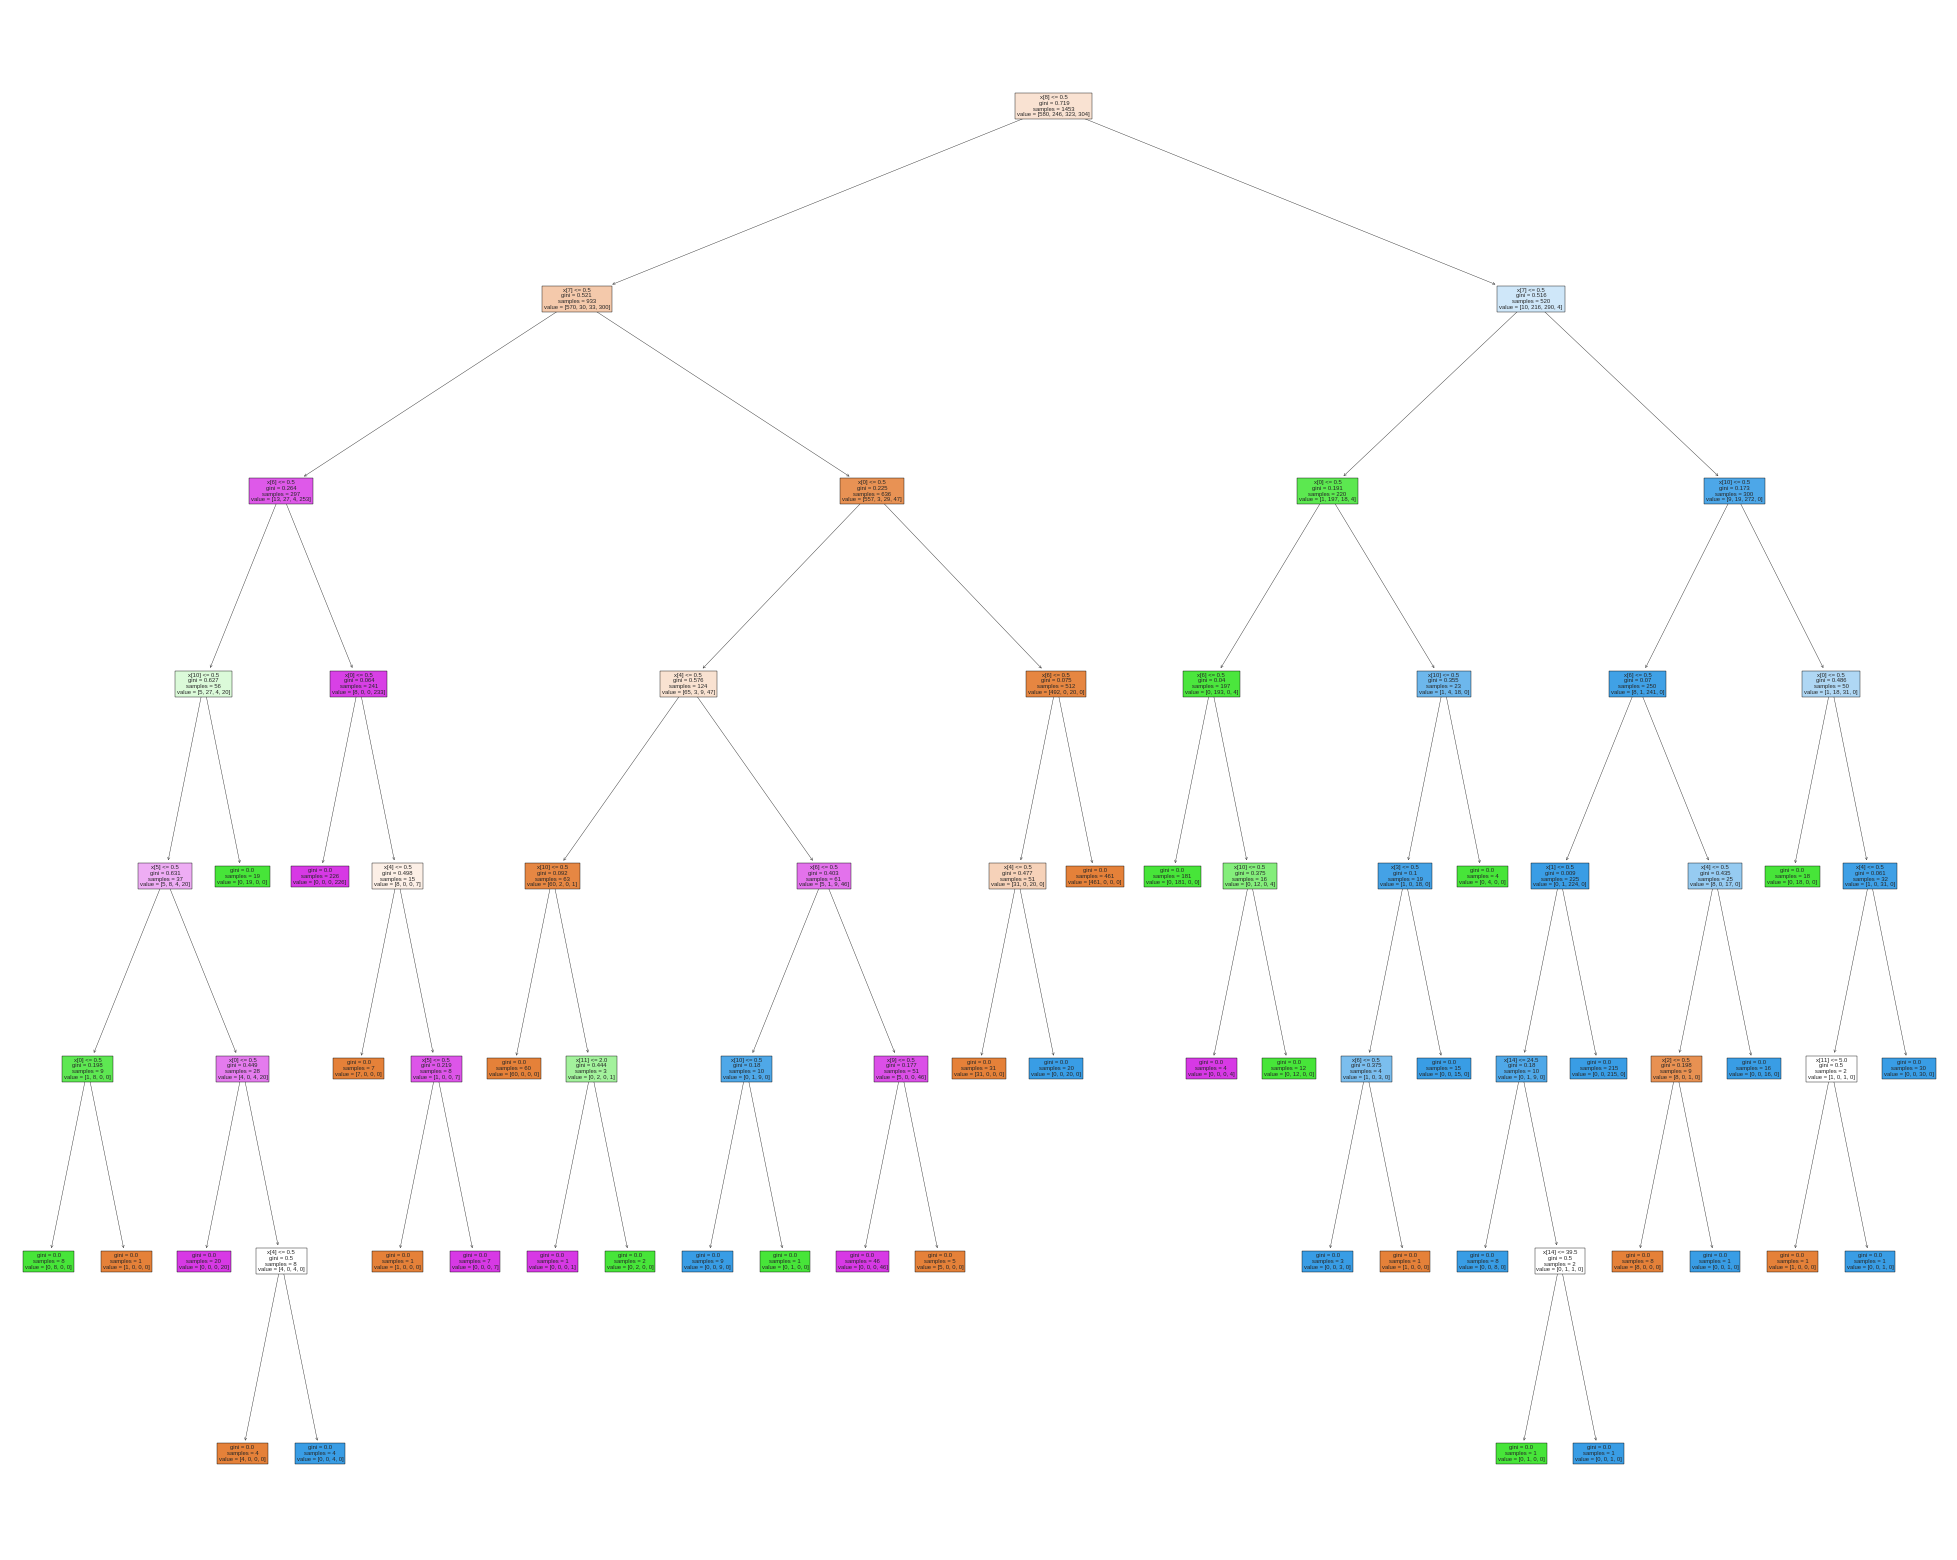

In [102]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dc, filled=True)